In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#df = pd.read_excel('BBDD_Hospitalización.xlsx')

In [24]:
df = pd.read_csv('BBDD_hospitalv2.csv')

In [4]:
df['AGENTE AISLADO'].fillna("NO", inplace=True)

In [ ]:
df['HOSPITALIZACION'].fillna("NO", inplace=True)

In [ ]:
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].fillna("NO", inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
#df = df.drop(df[df['EDAD'] > 100].index)
df.loc[df['EDAD'] > 100, 'EDAD'] -= 100.0

In [ ]:
df.isna().sum()

In [ ]:
df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'] = df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].replace('FLUOROQUINOLONA_AMINOGLICÓSIDO', 'FLUOROQUINOLONA_AMINOGLICOSIDO')
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace('SI, EPOC', 'SI')
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace('SI, ASMA', 'SI')
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].replace('NO', '0')


In [ ]:
df['EDAD'] = df['EDAD'].astype(int)
df['DIAS HOSPITALIZACION MQ'] = df['DIAS HOSPITALIZACION MQ'].astype(int)
df['DIAS HOSPITALIZACIÓN UPC'] = df['DIAS HOSPITALIZACIÓN UPC'].astype(int)
df['NUMERO DE MUESTRAS TOMADAS'] = df['NUMERO DE MUESTRAS TOMADAS'].astype(int)
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].astype(int)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       562 non-null    int64  
 1   DIABETES                                                                   562 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 562 non-null    object 
 3   PSA                                                                        562 non-null    float64
 4   BIOPSIAS PREVIAS                                                           562 non-null    object 
 5   VOLUMEN PROSTATICO                                                         562 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [7]:
print(df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].value_counts())
'EDAD'
'DIABETES'
'HOSPITALIZACIÓN ULTIMO MES'
'PSA'
'BIOPSIAS PREVIAS'
'VOLUMEN PROSTATICO'
'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'
'NUMERO DE MUESTRAS TOMADAS'
'CUP'
'ENF. CRONICA PULMONAR OBSTRUCTIVA'
'BIOPSIA'
'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'
'FIEBRE'
'ITU'
'TIPO DE CULTIVO'
'AGENTE AISLADO'
'PATRON DE RESISTENCIA'
'HOSPITALIZACION'
'DIAS HOSPITALIZACION MQ'
'DIAS HOSPITALIZACIÓN UPC'

NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
0    537
2      8
3      8
1      5
5      2
9      2
Name: count, dtype: int64


'DIAS HOSPITALIZACIÓN UPC'

In [26]:
data = df
# Elimino las columnas que considero redundantes
data.drop(columns=['NUMERO DE MUESTRAS TOMADAS','NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA','HOSPITALIZACIÓN ULTIMO MES','BIOPSIAS PREVIAS','NUMERO DE MUESTRAS TOMADAS'], inplace=True)
data


,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,NO,4.0,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,7.7,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,29.0,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
3,56,NO,7.0,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,29.0,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,78,NO,9.3,SI,CEFALOSPORINA_AMINOGLUCOCIDO,NO,NO,NEG,NO,NO,NO,NO,NO,NO,0,0
558,67,NO,6.0,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,0,0
559,64,NO,4.8,SI,OTROS,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,0,0
560,67,NO,8.0,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,0,0


In [27]:
# reemplazamos los valores Si y No, por 1 y 0
data.replace('NO',0, inplace=True)
data.replace('SI',1, inplace=True)

In [28]:
# Utilizamos la funcion dummies para lograr una mejor categorizacion de los datos
limp = pd.get_dummies(data,columns=['BIOPSIA','TIPO DE CULTIVO','AGENTE AISLADO','PATRON DE RESISTENCIA','ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'])
limp.replace(True,1, inplace=True)
limp.replace(False,0, inplace=True)

In [29]:
limp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 38 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   EDAD                                                                                                   562 non-null    int64  
 1   DIABETES                                                                                               562 non-null    int64  
 2   PSA                                                                                                    562 non-null    float64
 3   VOLUMEN PROSTATICO                                                                                     562 non-null    int64  
 4   CUP                                                                                               

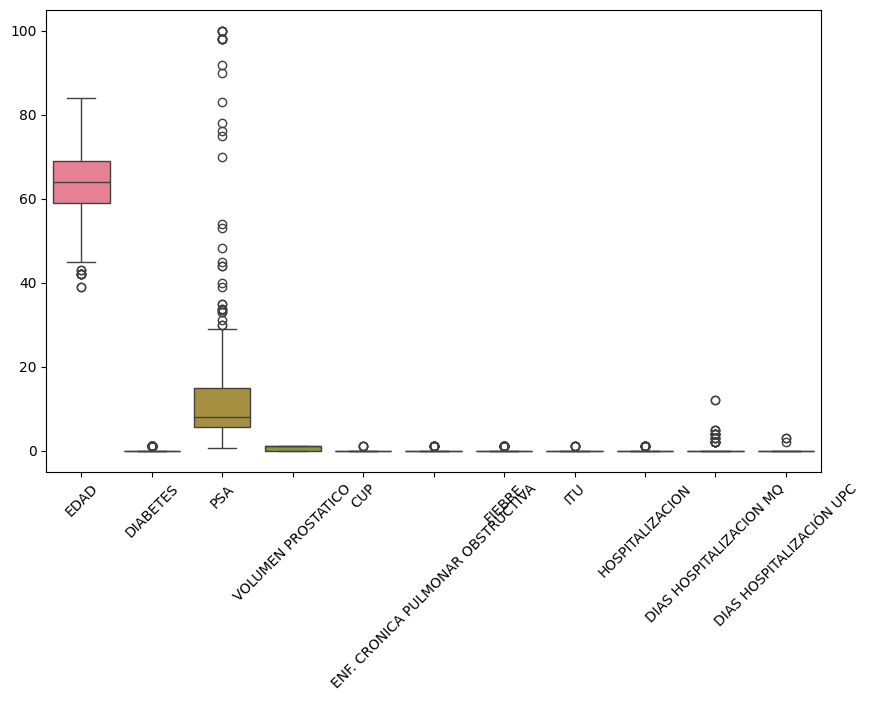

In [30]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=data)

plt.xticks(rotation=45)

plt.show()

In [31]:
limp

,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,FIEBRE,ITU,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,...,AGENTE AISLADO_PSEUDOMONAS AERUGINOSA,PATRON DE RESISTENCIA_0,"PATRON DE RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R",PATRON DE RESISTENCIA_MULTI SENSIBLE,"PATRON DE RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA","PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA",ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_CEFALOSPORINA_AMINOGLUCOCIDO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_FLUOROQUINOLONA_AMINOGLICOSIDO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_OROQUINOLONAS,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_OTROS
0,53,0,4.0,1,0,0,1,0,1,2,...,0,1,0,0,0,0,0,1,0,0
1,56,0,7.7,1,0,0,1,0,1,5,...,0,1,0,0,0,0,0,1,0,0
2,57,0,29.0,1,0,0,1,0,1,4,...,0,0,1,0,0,0,0,1,0,0
3,56,0,7.0,1,0,0,1,0,1,5,...,0,1,0,0,0,0,0,1,0,0
4,55,0,29.0,1,0,0,1,0,1,4,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,78,0,9.3,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
558,67,0,6.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
559,64,0,4.8,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
560,67,0,8.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
